In [1]:
%matplotlib inline
import os,random
os.environ["THEANO_FLAGS"] = "mode=FAST_RUN,device=gpu%d,floatX=float32"%(random.randint(0,3))
import seaborn as sns
from gym import envs

/usr/local/lib/python2.7/dist-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [2]:
env = "Pong-v0"
env = envs.make(env)

INFO:gym.envs.registration:Making new env: Pong-v0
[2016-06-02 12:06:44,952] Making new env: Pong-v0


In [ ]:
import dqn
agent = dqn.D2QN(env, 
                  nframes=1, 
                  epsilon=0.1, 
                  discount=0.99, 
                  modelfactory=dqn.simple_cnn,
                  epsilon_schedule=lambda episode,epsilon: epsilon,                
                  update_nsamp=1000, 
                  batch_size=32, 
                  dropout=0.5,
                  timesteps_per_batch=200, 
                  stats_rate=10,
                  enable_plots = True, 
                  max_memory = 1000000, 
                  difference_obs = True )

Using Theano backend.
Using gpu device 2: GeForce GTX TITAN X (CNMeM is disabled, cuDNN 5004)

Input Dim:  100800 [1, 210, 160, 3]
Output Actions:  [0, 1, 2, 3, 4, 5]
____________________________________________________________________________________________________
Layer (type)                       Output Shape        Param #     Connected to                     
input_1 (InputLayer)               (None, 100800)      0                                            
____________________________________________________________________________________________________
reshape_1 (Reshape)                (None, 1, 210, 160, 0           input_1[0][0]                    
____________________________________________________________________________________________________
timedistributed_1 (TimeDistributed)(None, 1, 16, 40, 1)215056      reshape_1[0][0]                  
____________________________________________________________________________________________________
timedistributed_2 (TimeDistributed)(None, 1, 32, 20, 1)8224        timedistributed_1[0][0]          
___________________

/usr/lib/pymodules/python2.7/matplotlib/collections.py:548: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


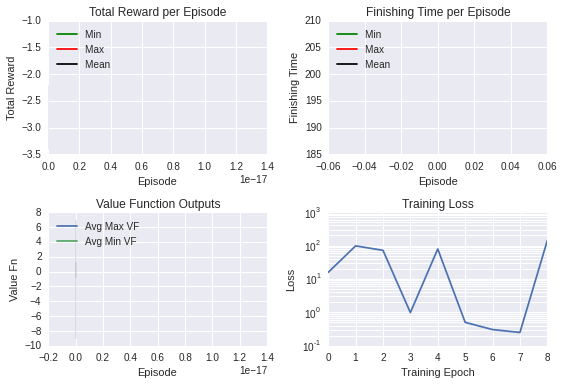

In [ ]:
agent.learn(ipy_clear=True, max_episodes=100000, max_pathlength=200)

